# Implementing Recurrent Neural network on a Sign Wave

<b>Import required libraries<b/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.linspace(0, 50, num=501)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [3]:
X = np.linspace(0, 50, num=501)

In [4]:
y = np.sin(X)

In [5]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

<b>Visualizing Sign Wave<b/>

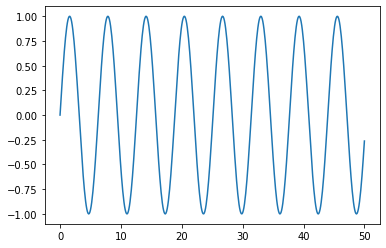

In [6]:
plt.plot(X,y)

In [7]:
df = pd.DataFrame(data=y, index=X, columns=['Sine'] )

In [8]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [9]:
#Train Test split for RNN is different compared to regular splits because of forecasting

In [10]:
len(df)

501

<b>Take a random cut off point<b/>

In [11]:
np.round(len(df)*0.1)

50.0

In [12]:
split_index = int(len(df) - np.round(len(df)*0.1))

In [13]:
split_index

451

In [14]:
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In [15]:
train.shape

(451, 1)

<b>Scaling Data<b/>

In [16]:
#Since we are feeding the output as input again, we need to scale y, compared to ANN/CNN where we scale only X
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

<b>Take training data and create batches<b/>

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [30]:
#length should be enough for the network to pickup any seasonality or repeating effects
length_of_seq = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length_of_seq, batch_size=batch_size)

In [31]:
len(generator)

449

<b>Checking batch output<b/>

In [32]:
X, y = generator[0]

In [33]:
X

array([[[0.49999912],
        [0.54991622]]])

In [34]:
y

array([[0.59933458]])

In [35]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


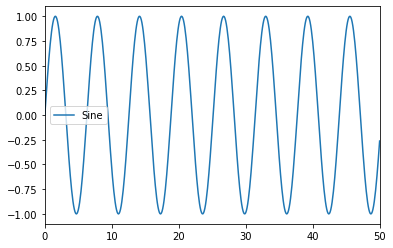

In [36]:
#Feed the network a long enough sequence of information so that it can pick up the trend
df.plot()

<b>Creating new generator with a sequence length of 50<b/>

In [38]:
length_of_seq = 50
batch_size = 1

generator2 = TimeseriesGenerator(scaled_train, scaled_train, length=length_of_seq, batch_size=batch_size)

<b>Creating the Model<b/>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM

In [40]:
no_of_features = 1

In [42]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length_of_seq, no_of_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


<b>Evaluate model and visualize losses<b/>

In [46]:
model.fit_generator(generator2, epochs=5)

Epoch 1/5
401/401 [==============================] - 27s 67ms/step - loss: 0.0157
Epoch 2/5
401/401 [==============================] - 25s 63ms/step - loss: 2.2460e-04
Epoch 3/5
401/401 [==============================] - 28s 69ms/step - loss: 1.1001e-04
Epoch 4/5
401/401 [==============================] - 30s 74ms/step - loss: 0.0020
Epoch 5/5
401/401 [==============================] - 29s 72ms/step - loss: 2.8086e-05


In [48]:
model.history.history

{'loss': [0.01567809706410861,
  0.00022460171163822114,
  0.00011000906283896055,
  0.0020408301546741715,
  2.8086228461975065e-05]}

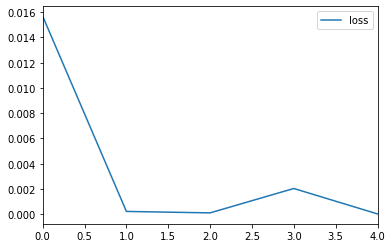

In [50]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<b>Evaluate on test data<b/>

In [51]:
first_out_batch = scaled_train[-length_of_seq:]

In [52]:
first_out_batch.shape

(50, 1)

In [55]:
first_out_batch = first_out_batch.reshape(1, length_of_seq, no_of_features)

In [56]:
first_out_batch.shape

(1, 50, 1)

In [58]:
model.predict(first_out_batch)

array([[0.95727056]], dtype=float32)

In [59]:
scaled_test[0]

array([0.94955134])

In [61]:
test_predictions = []

first_out_batch = scaled_train[-length_of_seq:]
current_out_batch = first_out_batch.reshape(1, length_of_seq, no_of_features)

for i in range(len(test)):
    
    current_pred = model.predict(current_out_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_out_batch = np.append(current_out_batch[:,1:,:], [[current_pred]], axis=1)

<b>Visualizing predictions<b/>

In [62]:
test_predictions

[array([0.95727056], dtype=float32),
 array([0.978132], dtype=float32),
 array([0.996068], dtype=float32),
 array([1.0084732], dtype=float32),
 array([1.0150238], dtype=float32),
 array([1.0167406], dtype=float32),
 array([1.013524], dtype=float32),
 array([1.003589], dtype=float32),
 array([0.9890697], dtype=float32),
 array([0.97045213], dtype=float32),
 array([0.9473519], dtype=float32),
 array([0.92065287], dtype=float32),
 array([0.8889947], dtype=float32),
 array([0.85533553], dtype=float32),
 array([0.81778455], dtype=float32),
 array([0.77845], dtype=float32),
 array([0.7363355], dtype=float32),
 array([0.69243795], dtype=float32),
 array([0.64680094], dtype=float32),
 array([0.60051984], dtype=float32),
 array([0.5531538], dtype=float32),
 array([0.50543815], dtype=float32),
 array([0.45745897], dtype=float32),
 array([0.40962285], dtype=float32),
 array([0.3635784], dtype=float32),
 array([0.31767908], dtype=float32),
 array([0.27412945], dtype=float32),
 array([0.23241755], 

In [63]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [66]:
true_predictions = scaler.inverse_transform(test_predictions)

In [67]:
true_predictions

array([[ 0.91453555],
       [ 0.95625811],
       [ 0.99212981],
       [ 1.01693992],
       [ 1.03004116],
       [ 1.0334746 ],
       [ 1.02704164],
       [ 1.00717175],
       [ 0.97813332],
       [ 0.94089848],
       [ 0.89469833],
       [ 0.84130075],
       [ 0.77798491],
       [ 0.71066713],
       [ 0.63556576],
       [ 0.55689732],
       [ 0.47266901],
       [ 0.38487457],
       [ 0.29360128],
       [ 0.20103983],
       [ 0.10630854],
       [ 0.01087798],
       [-0.0850796 ],
       [-0.18075109],
       [-0.27283922],
       [-0.36463715],
       [-0.45173571],
       [-0.53515883],
       [-0.61213046],
       [-0.68294599],
       [-0.74543488],
       [-0.80143117],
       [-0.84784892],
       [-0.8853871 ],
       [-0.91349928],
       [-0.93172363],
       [-0.94280167],
       [-0.94324923],
       [-0.93603307],
       [-0.91800357],
       [-0.89368573],
       [-0.85919102],
       [-0.8182369 ],
       [-0.76648293],
       [-0.70759249],
       [-0

In [69]:
test['Predictions'] = true_predictions

e:\users\user.desktop-3hhgvth\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
test.head()

,Sine,Predictions
45.1,0.899097,0.914536
45.2,0.938307,0.956258
45.3,0.968142,0.992130
45.4,0.988304,1.016940
45.5,0.998591,1.030041


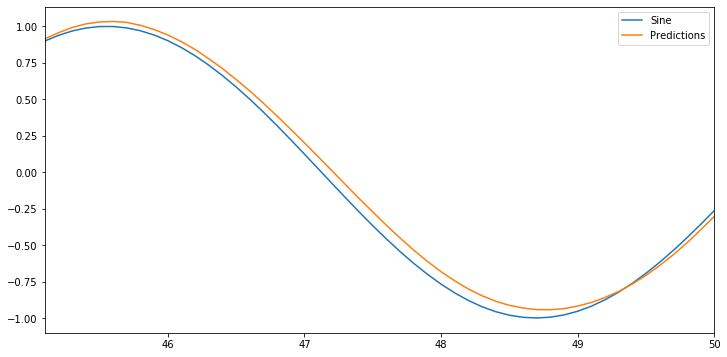

In [74]:
test.plot(figsize=(12,6))

<b>Reporting Metrics<b/>

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(scaled_test, true_predictions))
print('\n')
print(mean_squared_error(scaled_test, true_predictions))
print('\n')
print(np.sqrt(mean_squared_error(scaled_test, true_predictions)))
print('\n')

0.5108065358374918


0.3917431407495377


0.6258938733919175




<b>Implementing Early stops to improve model accuracy<b>

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

<b>Creating Validaion Generator<b/>

In [83]:
new_length = 49

generator3 = TimeseriesGenerator(scaled_train, scaled_train, length=new_length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=new_length, batch_size=1)

<b>Creating new LSTM model<b/>

In [84]:
model = Sequential()

model.add(LSTM(50, input_shape=(new_length, no_of_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [85]:
model.fit_generator(generator3, epochs=20, validation_data = validation_generator, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 49s 123ms/step - loss: 0.0117 - val_loss: 9.8138e-05
Epoch 2/20
402/402 [==============================] - 47s 117ms/step - loss: 1.9404e-04 - val_loss: 3.5357e-04
Epoch 3/20
402/402 [==============================] - 47s 118ms/step - loss: 1.8227e-04 - val_loss: 1.0418e-04


<b>Evaluating predictions on new model<b/>

In [86]:
test_predictions = []

first_out_batch = scaled_train[-new_length:]
current_out_batch = first_out_batch.reshape(1, new_length, no_of_features)

for i in range(len(test)):
    
    current_pred = model.predict(current_out_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_out_batch = np.append(current_out_batch[:,1:,:], [[current_pred]], axis=1)

In [87]:
true_predictions = scaler.inverse_transform(test_predictions)

e:\users\user.desktop-3hhgvth\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


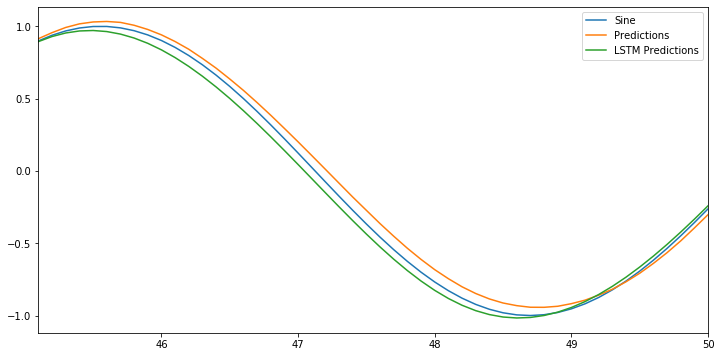

In [88]:
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,6))

<b>Forecasting beyond 50<b/>

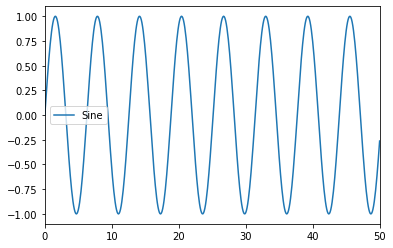

In [89]:
df.plot()

In [90]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

<b>Define new generator & model<b/>

In [91]:
generator_final = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=new_length, batch_size=1)

In [92]:
model = Sequential()

model.add(LSTM(50, input_shape=(new_length, no_of_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [93]:
model.fit_generator(generator_final, epochs=3)

Epoch 1/3
452/452 [==============================] - 51s 114ms/step - loss: 0.0126
Epoch 2/3
452/452 [==============================] - 54s 119ms/step - loss: 3.9491e-04
Epoch 3/3
452/452 [==============================] - 49s 108ms/step - loss: 1.2816e-04


<b>Forecast future data<b/>

In [106]:
forecast = []

first_out_batch = scaled_train[-new_length:]
current_out_batch = first_out_batch.reshape(1, new_length, no_of_features)

#Forecast 25 points into the future
for i in range(25):
    
    current_pred = model.predict(current_out_batch)[0]
    
    forecast.append(current_pred)
    
    current_out_batch = np.append(current_out_batch[:,1:,:], [[current_pred]], axis=1)

In [107]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [108]:
forecast = scaler.inverse_transform(forecast)

In [109]:
forecast

array([[ 0.89718991],
       [ 0.93464052],
       [ 0.96197904],
       [ 0.97903561],
       [ 0.98579448],
       [ 0.98237141],
       [ 0.96900327],
       [ 0.94602908],
       [ 0.9138718 ],
       [ 0.87302078],
       [ 0.82401721],
       [ 0.76743891],
       [ 0.70389097],
       [ 0.63399603],
       [ 0.55839351],
       [ 0.47773572],
       [ 0.39268939],
       [ 0.30393974],
       [ 0.21219415],
       [ 0.11819051],
       [ 0.02269963],
       [-0.07346502],
       [-0.16944453],
       [-0.26433139],
       [-0.35716988]])

In [110]:
forecast_index = np.arange(50.1, 52.6, 0.1)

In [111]:
len(forecast_index)

25

<b>Visualizing Future Forecast<b/>

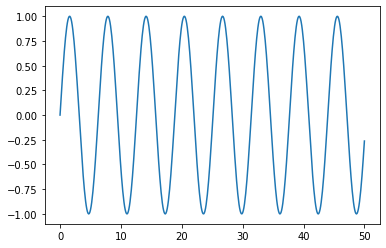

In [112]:
plt.plot(df.index, df['Sine'])

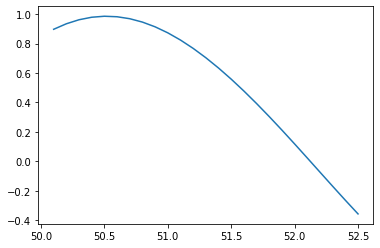

In [113]:
plt.plot(forecast_index, forecast)

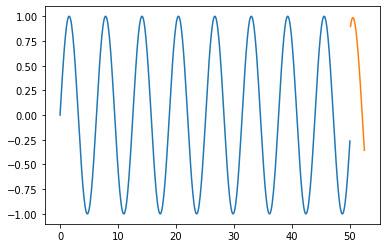

In [114]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)